In [15]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl

In [7]:
import pandas_datareader as web
amd = web.get_data_yahoo('AMD', 
                          start=datetime(2010, 1, 1), 
                          end=datetime(2019, 12, 31))

In [10]:
amd.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,9.77,9.63,9.75,9.68,9396500,9.68
2010-01-04,9.90,9.68,9.79,9.70,18748700,9.70
2010-01-05,9.90,9.68,9.71,9.71,22145700,9.71
2010-01-06,9.76,9.55,9.68,9.57,18643400,9.57
2010-01-07,9.55,9.18,9.51,9.47,26806800,9.47


In [12]:
# Removing first row, we only want from 2010
amd = amd.iloc[1:]
amd.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-05,9.90,9.68,9.71,9.71,22145700,9.71
2010-01-06,9.76,9.55,9.68,9.57,18643400,9.57
2010-01-07,9.55,9.18,9.51,9.47,26806800,9.47
2010-01-08,9.47,9.29,9.37,9.43,13752800,9.43
2010-01-11,9.44,9.08,9.38,9.14,23700100,9.14


In [14]:
# calculating the simple moving average (which is just mean calculated progressively) 
# and add the result as a new column to dataframe

amd["100_obs_for_SMA"] = amd["Adj Close"].rolling(window=100).mean()
amd

c:\users\sys\documents\ml-datascience\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,High,Low,Open,Close,Volume,Adj Close,100_obs_for_SMA
Date,,,,,,,
2010-01-05,9.900000,9.680000,9.710000,9.710000,22145700,9.710000,NaN
2010-01-06,9.760000,9.550000,9.680000,9.570000,18643400,9.570000,NaN
2010-01-07,9.550000,9.180000,9.510000,9.470000,26806800,9.470000,NaN
2010-01-08,9.470000,9.290000,9.370000,9.430000,13752800,9.430000,NaN
2010-01-11,9.440000,9.080000,9.380000,9.140000,23700100,9.140000,NaN
2010-01-12,8.920000,8.520000,8.890000,8.650000,33387100,8.650000,NaN
2010-01-13,9.200000,8.550000,8.710000,9.150000,32741900,9.150000,NaN
2010-01-14,9.260000,8.920000,9.180000,9.000000,22556600,9.000000,NaN
2010-01-15,9.190000,8.800000,9.130000,8.840000,34336600,8.840000,NaN


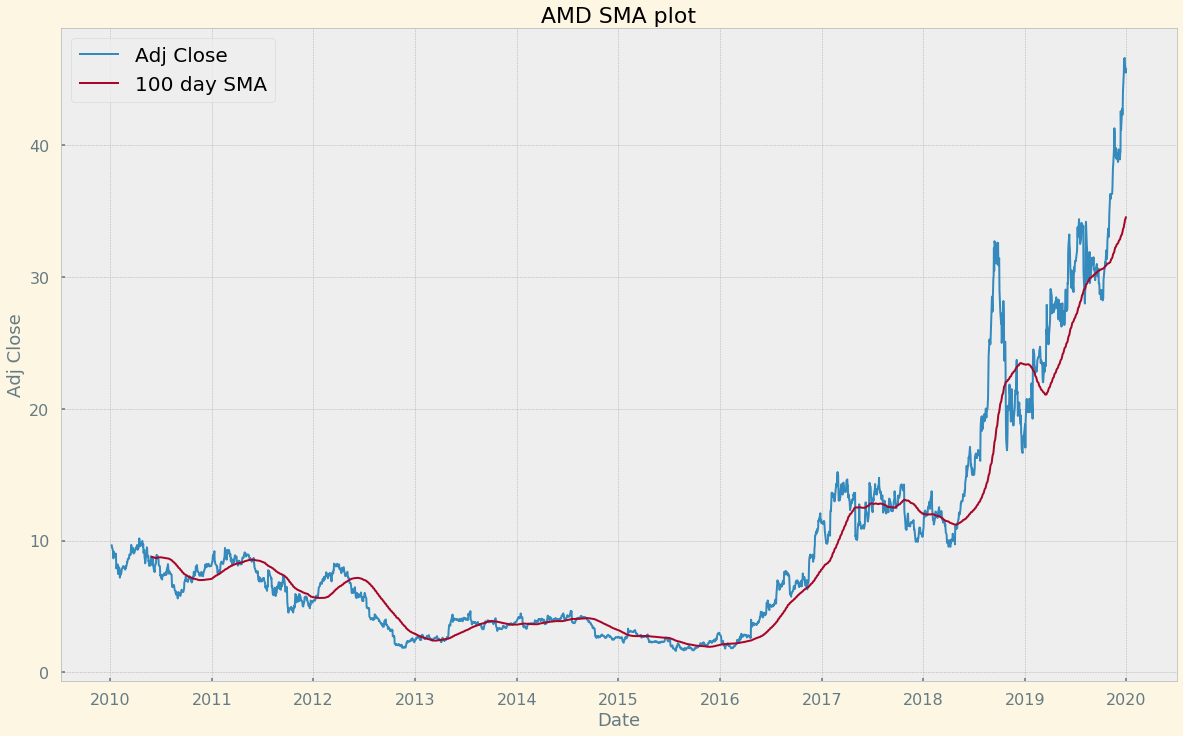

In [24]:
# Plotting Adj Close and calculated SMA

plt.style.use('seaborn-bright')
plt.style.use('bmh')
fig = plt.figure(figsize=(20,12))
ax1 = plt.plot(amd["Adj Close"])
ax1 = plt.plot(amd["100_obs_for_SMA"])
ax1 = plt.title("AMD SMA plot", fontsize=22)
ax1 = plt.xlabel("Date", fontsize=18)
ax1 = plt.ylabel("Adj Close", fontsize=18)
ax1 = plt.legend(["Adj Close", "100 day SMA"],prop={"size":20}, loc="upper left")
plt.grid(True)
plt.show()

In [20]:
mpl.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [26]:
### BUY: When MA > price
### SELL: When MA < price
# WHY? "We hope to catch the ride when the asset is trending upwards, gaining similar returns. When it trends downwards choose to sell out and wait, or short sell in order to benefit from the fall."

li = []
for i in range(amd.shape[0]):
    if amd["Adj Close"].iloc[i] > amd["100_obs_for_SMA"].iloc[i]:
        li.append("Sell")
    else:
        li.append("Buy")
amd["strategy"] = li
amd.tail()

c:\users\sys\documents\ml-datascience\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,High,Low,Open,Close,Volume,Adj Close,100_obs_for_SMA,strategy
Date,,,,,,,,
2019-12-24,46.610001,45.770000,46.099998,46.540001,44432200,46.540001,33.9582,Sell
2019-12-26,47.310001,45.660000,46.990002,46.630001,57562800,46.630001,34.1446,Sell
2019-12-27,46.880001,45.980000,46.849998,46.180000,36581300,46.180000,34.3178,Sell
2019-12-30,46.169998,44.660000,46.139999,45.520000,41149700,45.520000,34.4811,Sell
2019-12-31,46.090000,44.919998,45.070000,45.860001,31673200,45.860001,34.6005,Sell


In [33]:
## Encoding of categorical strategy column -> Sell = 1, Buy = 0

ll = list(amd.strategy)
for idx, val in enumerate(ll):
    if val=="Sell":
        ll[idx] = 1
    else:
        ll[idx] = 0
        
print(len(ll))

amd['strategy_encoded'] = ll
amd 

2515


c:\users\sys\documents\ml-datascience\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,High,Low,Open,Close,Volume,Adj Close,100_obs_for_SMA,strategy,strategy_encoded
Date,,,,,,,,,
2010-01-05,9.900000,9.680000,9.710000,9.710000,22145700,9.710000,NaN,Buy,0
2010-01-06,9.760000,9.550000,9.680000,9.570000,18643400,9.570000,NaN,Buy,0
2010-01-07,9.550000,9.180000,9.510000,9.470000,26806800,9.470000,NaN,Buy,0
2010-01-08,9.470000,9.290000,9.370000,9.430000,13752800,9.430000,NaN,Buy,0
2010-01-11,9.440000,9.080000,9.380000,9.140000,23700100,9.140000,NaN,Buy,0
2010-01-12,8.920000,8.520000,8.890000,8.650000,33387100,8.650000,NaN,Buy,0
2010-01-13,9.200000,8.550000,8.710000,9.150000,32741900,9.150000,NaN,Buy,0
2010-01-14,9.260000,8.920000,9.180000,9.000000,22556600,9.000000,NaN,Buy,0
2010-01-15,9.190000,8.800000,9.130000,8.840000,34336600,8.840000,NaN,Buy,0


## LSTM to predict 'Buy' or 'Sell'

In [35]:
data = amd[['Adj Close', '100_obs_for_SMA', 'strategy_encoded']]
data

,Adj Close,100_obs_for_SMA,strategy_encoded
Date,,,
2010-01-05,9.710000,NaN,0
2010-01-06,9.570000,NaN,0
2010-01-07,9.470000,NaN,0
2010-01-08,9.430000,NaN,0
2010-01-11,9.140000,NaN,0
2010-01-12,8.650000,NaN,0
2010-01-13,9.150000,NaN,0
2010-01-14,9.000000,NaN,0
2010-01-15,8.840000,NaN,0


In [36]:
data.dropna(inplace=True)
data

c:\users\sys\documents\ml-datascience\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Adj Close,100_obs_for_SMA,strategy_encoded
Date,,,
2010-05-27,8.800000,8.7833,1
2010-05-28,8.570000,8.7719,0
2010-06-01,8.140000,8.7576,0
2010-06-02,8.540000,8.7483,0
2010-06-03,8.690000,8.7409,0
2010-06-04,8.110000,8.7306,0
2010-06-07,7.710000,8.7212,0
2010-06-08,7.770000,8.7074,0
2010-06-09,7.610000,8.6935,0


In [37]:
import tensorflow.keras as keras
from functools import partial
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Flatten, TimeDistributed, LSTM, Dense, Bidirectional, Dropout, ConvLSTM2D, Conv1D, GlobalMaxPooling1D, MaxPooling1D, Convolution1D, BatchNormalization, LeakyReLU


c:\users\sys\documents\ml-datascience\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\sys\documents\ml-datascience\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\sys\documents\ml-datascience\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\sys\documents\ml-datascience\lib\site-packages\tensorflow\

In [62]:
X_train = data.iloc[:2001, 0:2]
X_test = data.iloc[2001:,0:2]
Y_train = data.iloc[:2001, 2]
Y_test = data.iloc[2001:, 2]

# Convert to Numpy Array
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()
X_test = X_test.to_numpy()

In [63]:
# reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(2001, 1, 2) (2001,) (415, 1, 2) (415,)


In [64]:
keras.backend.clear_session()

n_steps = X_train.shape[1]
n_features = X_train.shape[2]

model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu', return_sequences=False))
model.add(Dense(10))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 100)            41200     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense (Dense)                (None, 10)                510       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 71,921
Trainable params: 71,921
Non-trainable params: 0
_________________________________________________________________


Train on 2001 samples, validate on 415 samples
Epoch 1/50
2001/2001 [==============================] - 2s 751us/sample - loss: 0.3056 - acc: 0.5322 - val_loss: 0.1685 - val_acc: 0.8361
Epoch 2/50
2001/2001 [==============================] - 0s 156us/sample - loss: 0.1769 - acc: 0.7756 - val_loss: 1.3325 - val_acc: 0.6699
Epoch 3/50
2001/2001 [==============================] - 0s 159us/sample - loss: 0.1305 - acc: 0.9075 - val_loss: 1.3545 - val_acc: 0.9084
Epoch 4/50
2001/2001 [==============================] - 0s 163us/sample - loss: 0.1066 - acc: 0.9420 - val_loss: 0.8262 - val_acc: 0.9398
Epoch 5/50
2001/2001 [==============================] - 0s 164us/sample - loss: 0.0860 - acc: 0.9530 - val_loss: 1.2155 - val_acc: 0.8819
Epoch 6/50
2001/2001 [==============================] - 0s 154us/sample - loss: 0.0713 - acc: 0.9555 - val_loss: 0.7779 - val_acc: 0.9301
Epoch 7/50
2001/2001 [==============================] - 0s 161us/sample - loss: 0.0541 - acc: 0.9595 - val_loss: 0.2129 - val

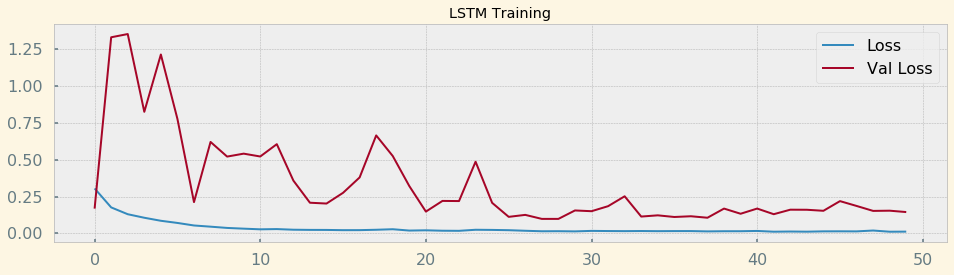

In [65]:
model.fit(X_train, Y_train, epochs=50, verbose=1, validation_data=[X_test, Y_test], use_multiprocessing=True)

plt.figure(figsize=(16,4))
plt.plot(model.history.history['loss'], label='Loss')
plt.plot(model.history.history['val_loss'], label='Val Loss')
plt.legend(loc=1)
plt.title('LSTM Training')
plt.show()

In [60]:
y_preds = model.predict_classes(X_test)

In [75]:
preds_list = []

for i in y_preds:
    preds_list.append(i[0])
    
c = 0
for i, j in zip(y_preds, Y_test):
    if i!=j:
        c+=1

print("Number of wrong predictions on test set: ", c)

Number of wrong predictions on test set:  8
